## 2.1顺序高斯消去法

In [12]:
import numpy as np

def gaussian_elimination(A, b, epsilon=1e-10):
    """
    使用顺序高斯消去法求解线性方程组 Ax = b。

    参数:
    A (list of lists or np.array): 系数矩阵。
    b (list or np.array): 右端项向量。
    epsilon (float): 用于判断主元是否过小的阈值。

    返回:
    np.array: 方程组的解向量 x，如果无解或唯一解则返回 None。
    """
    # 将输入转换为 numpy 数组以便进行数值计算
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    
    n = len(b) 
    for k in range(n - 1):
        # 检查主元 a_kk 是否过小
        if abs(A[k, k]) <= epsilon:
            print(f"求解失败：主元 A[{k}][{k}] 过小，可能导致数值不稳定。")
            return None
        
        for i in range(k + 1, n):
            
            T = A[i, k] / A[k, k]
            
            b[i] = b[i] - T * b[k]
            
            
            A[i, k+1:] = A[i, k+1:] - T * A[k, k+1:]
            
            A[i, k] = 0

    if abs(A[n-1, n-1]) <= epsilon:
        print("求解失败：矩阵奇异，无法回代。")
        return None

    x = np.zeros(n) 

    
    x[n-1] = b[n-1] / A[n-1, n-1]

    
    for i in range(n - 2, -1, -1):

        sum_ax = np.dot(A[i, i+1:], x[i+1:])
        x[i] = (b[i] - sum_ax) / A[i, i]

    return x


if __name__ == '__main__':
    
    
    A_matrix = [[2, 3, 5],
                [3, 4, 7],
                [1, 3, 3]]
    
    b_vector = [5, 6, 5]

    print("系数矩阵 A:")
    print(np.array(A_matrix))
    print("\n右端项 b:")
    print(np.array(b_vector))

    # 求解
    solution = gaussian_elimination(A_matrix, b_vector)

    if solution is not None:
        print("\n方程组的解 x:")
        print(solution)
        

系数矩阵 A:
[[2 3 5]
 [3 4 7]
 [1 3 3]]

右端项 b:
[5 6 5]

方程组的解 x:
[-4.  1.  2.]


## 2.2 列主元高斯消去法

In [13]:
import numpy as np

def gaussian_elimination_partial_pivot(A, b, epsilon=1e-10):
    """
    使用列主元高斯消去法求解线性方程组 Ax = b。

    参数:
    A (list of lists or np.array): 系数矩阵。
    b (list or np.array): 右端项向量。
    epsilon (float): 用于判断主元是否过小的阈值。

    返回:
    np.array: 方程组的解向量 x，如果无解或唯一解则返回 None。
    """
    
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    
    n = len(b) 

    
    for k in range(n - 1):
        
        max_index = np.argmax(np.abs(A[k:, k])) + k
        
        
        if abs(A[max_index, k]) < epsilon:
            print(f"求解失败：矩阵在第 {k} 列为奇异或病态，无法找到合适的主元。")
            return None
            
        
        if max_index != k:
            
            A[[k, max_index]] = A[[max_index, k]]
            
            b[[k, max_index]] = b[[max_index, k]]
            
        
        for i in range(k + 1, n):
            
            T = A[i, k] / A[k, k]
            
            
            b[i] = b[i] - T * b[k]
            
           
            A[i, k+1:] = A[i, k+1:] - T * A[k, k+1:]
            
            
            A[i, k] = 0

    
    if abs(A[n-1, n-1]) <= epsilon:
        print("求解失败：矩阵奇异，无法回代。")
        return None

    x = np.zeros(n) 

   
    x[n-1] = b[n-1] / A[n-1, n-1]

  
    for i in range(n - 2, -1, -1):
        sum_ax = np.dot(A[i, i+1:], x[i+1:])
        x[i] = (b[i] - sum_ax) / A[i, i]

    return x


if __name__ == '__main__':
   
    A_matrix = [[2, 3, 5],
                [3, 4, 7],
                [1, 3, 3]]
    
    b_vector = [5, 6, 5]

    print("--- 列主元高斯消去法 ---")
    print("原始系数矩阵 A:")
    print(np.array(A_matrix))
    print("\n原始右端项 b:")
    print(np.array(b_vector))

    # 求解
    solution = gaussian_elimination_partial_pivot(A_matrix, b_vector)

    if solution is not None:
        print("\n方程组的解 x:")
        print(solution)
        

--- 列主元高斯消去法 ---
原始系数矩阵 A:
[[2 3 5]
 [3 4 7]
 [1 3 3]]

原始右端项 b:
[5 6 5]

方程组的解 x:
[-4.  1.  2.]


## 2.3 全主元高斯消去法

In [14]:
import numpy as np

def gaussian_elimination_complete_pivot(A, b, epsilon=1e-10):
    """
    使用全主元高斯消去法求解线性方程组 Ax = b。
    这是数值最稳定的高斯消去法变体。

    参数:
    A (list of lists or np.array): 系数矩阵。
    b (list or np.array): 右端项向量。
    epsilon (float): 用于判断主元是否过小的阈值。

    返回:
    np.array: 方程组的解向量 x，如果无解或唯一解则返回 None。
    """
    
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    
    n = len(b) 

   
    var_order = np.arange(n)

  
    for k in range(n - 1):
        
        sub_matrix = A[k:, k:]
        
        i_sub, j_sub = np.unravel_index(np.argmax(np.abs(sub_matrix)), sub_matrix.shape)
        
        
        pivot_row = i_sub + k
        pivot_col = j_sub + k
        
        
        if abs(A[pivot_row, pivot_col]) < epsilon:
            print(f"求解失败：矩阵在第 {k} 步为奇异或病态，无法找到合适的主元。")
            return None
            
        
        if pivot_row != k:
            A[[k, pivot_row]] = A[[pivot_row, k]]
            b[[k, pivot_row]] = b[[pivot_row, k]]
            
        
        if pivot_col != k:
            A[:, [k, pivot_col]] = A[:, [pivot_col, k]]
            
            var_order[[k, pivot_col]] = var_order[[pivot_col, k]]

        
        for i in range(k + 1, n):
            T = A[i, k] / A[k, k]
            b[i] -= T * b[k]
            A[i, k+1:] -= T * A[k, k+1:]
            A[i, k] = 0

   
    if abs(A[n-1, n-1]) <= epsilon:
        print("求解失败：矩阵奇异，无法回代。")
        return None


    permuted_x = np.zeros(n)
    permuted_x[n-1] = b[n-1] / A[n-1, n-1]

    for i in range(n - 2, -1, -1):
        sum_ax = np.dot(A[i, i+1:], permuted_x[i+1:])
        permuted_x[i] = (b[i] - sum_ax) / A[i, i]
        
    
    x = np.zeros(n)
    x[var_order] = permuted_x
    
    return x


if __name__ == '__main__':
    
    A_matrix = [[2, 3, 5],
                [3, 4, 7],
                [1, 3, 3]]
    
    b_vector = [5, 6, 5]

    print("--- 全主元高斯消去法 ---")
    print("原始系数矩阵 A:")
    print(np.array(A_matrix))
    print("\n原始右端项 b:")
    print(np.array(b_vector))

    # 求解
    solution = gaussian_elimination_complete_pivot(A_matrix, b_vector)

    if solution is not None:
        print("\n方程组的解 x:")
        print(solution)
        

--- 全主元高斯消去法 ---
原始系数矩阵 A:
[[2 3 5]
 [3 4 7]
 [1 3 3]]

原始右端项 b:
[5 6 5]

方程组的解 x:
[-4.  1.  2.]


## 2.4 LU分解

In [15]:
import numpy as np

def lu_decomposition(A, epsilon=1e-10):
    """
    使用杜利特尔(Doolittle)法进行 LU 分解 (A = LU)。
    L 是单位下三角矩阵，U 是上三角矩阵。

    参数:
    A (list of lists or np.array): 需要分解的方阵。
    epsilon (float): 用于判断主元是否过小的阈值。

    返回:
    (L, U) (tuple): 分解得到的 L 和 U 矩阵。如果分解失败则返回 (None, None)。
    """
    n = A.shape[0]
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for k in range(n):
        
        for j in range(k, n):
            
            s1 = np.dot(L[k, :k], U[:k, j])
            U[k, j] = A[k, j] - s1
        
        
        if abs(U[k, k]) < epsilon:
            print(f"求解失败：主元 U[{k}][{k}] = {U[k,k]:.2e} 过小，矩阵可能奇异。")
            return None, None
            
        
        L[k, k] = 1.0
        
        for i in range(k + 1, n):
           
            s2 = np.dot(L[i, :k], U[:k, k])
            L[i, k] = (A[i, k] - s2) / U[k, k]
            
    return L, U

def lu_solve(A, b, epsilon=1e-10):
    """
    使用 LU 直接分解法求解线性方程组 Ax = b。

    参数:
    A (list of lists or np.array): 系数矩阵。
    b (list or np.array): 右端项向量。
    epsilon (float): 传递给分解函数的阈值。

    返回:
    np.array: 方程组的解向量 x，如果无解或唯一解则返回 None。
    """
    
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    n = len(b)

    
    L, U = lu_decomposition(A, epsilon)
    if L is None: 
        return None

    
    y = np.zeros(n)
    for i in range(n):
        
        sum_ly = np.dot(L[i, :i], y[:i])
        y[i] = b[i] - sum_ly
        

   
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        
        sum_ux = np.dot(U[i, i+1:], x[i+1:])
        x[i] = (y[i] - sum_ux) / U[i, i]
        
    return x


if __name__ == '__main__':
    
    
    A_matrix = [[2, 3, 5],
                [3, 4, 7],
                [1, 3, 3]]
    
    b_vector = [5, 6, 5]

    print("--- LU 直接分解法求解 ---")
    print("原始系数矩阵 A:")
    print(np.array(A_matrix))
    print("\n原始右端项 b:")
    print(np.array(b_vector))

    # 分解
    L_res, U_res = lu_decomposition(np.array(A_matrix))
    if L_res is not None:
        print("\n分解得到的 L 矩阵:")
        print(L_res)
        print("\n分解得到的 U 矩阵:")
        print(U_res)
        print("\n验证 L * U 是否等于 A:")
        print(np.dot(L_res, U_res))


    # 求解
    solution = lu_solve(A_matrix, b_vector)

    if solution is not None:
        print("\n方程组的解 x:")
        print(solution)
       

--- LU 直接分解法求解 ---
原始系数矩阵 A:
[[2 3 5]
 [3 4 7]
 [1 3 3]]

原始右端项 b:
[5 6 5]

分解得到的 L 矩阵:
[[ 1.   0.   0. ]
 [ 1.5  1.   0. ]
 [ 0.5 -3.   1. ]]

分解得到的 U 矩阵:
[[ 2.   3.   5. ]
 [ 0.  -0.5 -0.5]
 [ 0.   0.  -1. ]]

验证 L * U 是否等于 A:
[[2. 3. 5.]
 [3. 4. 7.]
 [1. 3. 3.]]

方程组的解 x:
[-4.  1.  2.]


## 2.5 Jacobi迭代算法

In [ ]:
import numpy as np

def jacobi_iteration(A, b, Y, epsilon=1e-8, M=100):
    """
    使用雅可比(Jacobi)迭代法求解线性方程组 Ax = b。

    参数:
    A (list of lists or np.array): 系数矩阵。
    b (list or np.array): 右端项向量。
    Y (list or np.array): 初始猜测解向量。
    epsilon (float): 容许的误差，用于判断收敛。
    M (int): 容许的最大迭代次数。

    返回:
    (x, k) (tuple): 方程组的近似解向量 x 和实际迭代次数 k。
                     如果求解失败，返回 (None, k)。
    """
    
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    Y = np.array(Y, dtype=float)
    n = len(b)
    
    B = np.zeros_like(A)
    g = np.zeros_like(b)

    for i in range(n):
       
        diagonal_element = A[i, i]
        if abs(diagonal_element) < 1e-12: 
            print(f"求解失败：对角线元素 a[{i}][{i}] 过小，雅可比法不适用。")
            return None, 0
        
        
        g[i] = b[i] / diagonal_element
        
        
        for j in range(n):
            if i != j:
                B[i, j] = -A[i, j] / diagonal_element
    
    
    x_old = Y  
    
    for k in range(1, M + 1): 
        
        x_new = np.dot(B, x_old) + g
        
        
        error = np.linalg.norm(x_new - x_old, np.inf)
        
        
        if error < epsilon:
            print(f"在 {k} 次迭代后收敛。")
            return x_new, k
        
       
        x_old = x_new

    
    print(f"求解失败：达到最大迭代次数 {M} 后仍未收敛。")
    return x_old, M



if __name__ == '__main__':
    # 雅可比法收敛的一个充分条件是矩阵A为严格对角占优矩阵
    # |a_ii| > Σ|a_ij| for j!=i
    # 10 > 1+2=3 (True)
    #  8 > 1+3=4 (True)
    # 12 > 4+5=9 (True)
    # 所以该方程组使用雅可比法必定收敛
    A_matrix = [[10, 1, 2],
                [1, 8, 3],
                [2, 5, 12]]
    
    b_vector = [19, 23, 45]
    
    # 初始猜测解，从零向量开始
    initial_guess = [0, 0, 0]

    print("--- 雅可比迭代法求解 ---")
    print("系数矩阵 A:")
    print(np.array(A_matrix))
    print("\n右端项 b:")
    print(np.array(b_vector))
    print("\n初始解 Y:")
    print(np.array(initial_guess))

    
    solution, iterations = jacobi_iteration(
        A_matrix, 
        b_vector, 
        initial_guess,
        epsilon=1e-6, 
        M=100        
    )

    if solution is not None:
        print("\n方程组的近似解 x:")
        print(solution)
       

--- 雅可比迭代法求解 ---
系数矩阵 A:
[[10  1  2]
 [ 1  8  3]
 [ 2  5 12]]

右端项 b:
[19 23 45]

初始解 Y:
[0 0 0]
在 22 次迭代后收敛。

方程组的近似解 x:
[1.16112514 1.65473119 2.86700738]


In [17]:
import numpy as np

def gauss_seidel_iteration(A, b, Y, epsilon=1e-8, M=100):
    """
    使用高斯-赛德尔(Gauss-Seidel)迭代法求解线性方程组 Ax = b。

    参数:
    A (list of lists or np.array): 系数矩阵。
    b (list or np.array): 右端项向量。
    Y (list or np.array): 初始猜测解向量。
    epsilon (float): 容许的误差，用于判断收敛。
    M (int): 容许的最大迭代次数。

    返回:
    (x, k) (tuple): 方程组的近似解向量 x 和实际迭代次数 k。
                     如果求解失败，返回 (None, k)。
    """
 
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    n = len(b)
    

    for i in range(n):
        if abs(A[i, i]) < 1e-12:
            print(f"求解失败：对角线元素 a[{i}][{i}] 过小，该方法不适用。")
            return None, 0
            

    x = np.array(Y, dtype=float) 
    
    for k in range(1, M + 1):
        x_old = x.copy() 
        
        
        for i in range(n):
            
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x_old[i+1:])
            
            
            x[i] = (b[i] - sigma) / A[i, i]
            
        
        error = np.linalg.norm(x - x_old, np.inf)
        
        if error < epsilon:
            print(f"在 {k} 次迭代后收敛。")
            return x, k

    # 如果循环结束仍未收敛
    print(f"求解失败：达到最大迭代次数 {M} 后仍未收敛。")
    return x, M



if __name__ == '__main__':
    
    A_matrix = [[10, 1, 2],
                [1, 8, 3],
                [2, 5, 12]]
    
    b_vector = [19, 23, 45]
    
    initial_guess = [0, 0, 0]

    print("--- 高斯-赛德尔迭代法求解 ---")
    print("系数矩阵 A:")
    print(np.array(A_matrix))
    print("\n右端项 b:")
    print(np.array(b_vector))
    print("\n初始解 Y:")
    print(np.array(initial_guess))

    # 求解
    solution, iterations = gauss_seidel_iteration(
        A_matrix, 
        b_vector, 
        initial_guess,
        epsilon=1e-6, 
        M=100        
    )

    if solution is not None:
        print("\n方程组的近似解 x:")
        print(solution)
        print(f"\n对比雅可比法，高斯-赛德尔法可能用更少的迭代次数达到同样的精度。")
        

--- 高斯-赛德尔迭代法求解 ---
系数矩阵 A:
[[10  1  2]
 [ 1  8  3]
 [ 2  5 12]]

右端项 b:
[19 23 45]

初始解 Y:
[0 0 0]
在 10 次迭代后收敛。

方程组的近似解 x:
[1.16112531 1.65473151 2.86700765]

对比雅可比法，高斯-赛德尔法可能用更少的迭代次数达到同样的精度。


## 2.7 松弛迭代算法

In [18]:
import numpy as np

def sor_iteration(A, b, omega, Y, epsilon=1e-8, M=100):
    """
    使用超松弛(SOR)迭代法求解线性方程组 Ax = b。

    参数:
    A (list of lists or np.array): 系数矩阵。
    b (list or np.array): 右端项向量。
    omega (float): 松弛因子, 必须在 (0, 2) 范围内。
    Y (list or np.array): 初始猜测解向量。
    epsilon (float): 容许的误差，用于判断收敛。
    M (int): 容许的最大迭代次数。

    返回:
    (x, k) (tuple): 方程组的近似解向量 x 和实际迭代次数 k。
                     如果求解失败，返回 (None, k)。
    """
    
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    n = len(b)

   
    if not (0 < omega < 2):
        print(f"求解失败：松弛因子 omega = {omega} 不在有效范围 (0, 2) 内。")
        return None, 0
    

    for i in range(n):
        if abs(A[i, i]) < 1e-12:
            print(f"求解失败：对角线元素 a[{i}][{i}] 过小，该方法不适用。")
            return None, 0
            

    x = np.array(Y, dtype=float)
    
    for k in range(1, M + 1): 
        x_old = x.copy()
        
        
        for i in range(n):
            
            sigma = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x_old[i+1:])
            
           
            gauss_seidel_val = (b[i] - sigma) / A[i, i]
            
        
            x[i] = (1 - omega) * x_old[i] + omega * gauss_seidel_val

        
        error = np.linalg.norm(x - x_old, np.inf)
        
        if error < epsilon:
            print(f"在 {k} 次迭代后收敛。")
            return x, k

  
    print(f"求解失败：达到最大迭代次数 {M} 后仍未收敛。")
    return x, M



if __name__ == '__main__':

    A_matrix = [[10, 1, 2],
                [1, 8, 3],
                [2, 5, 12]]
    
    b_vector = [19, 23, 45]
    
    initial_guess = [0, 0, 0]
    tolerance = 1e-7

    print("--- 超松弛(SOR)迭代法求解 ---\n")
    
  
    print(f"omega = 1.0 (等同于 Gauss-Seidel):")
    solution_gs, iterations_gs = sor_iteration(
        A_matrix, b_vector, 1.0, initial_guess, epsilon=tolerance
    )
    if solution_gs is not None:
        print(f"  解: {solution_gs}, 迭代次数: {iterations_gs}\n")


    
    omega_optimal = 1.1
    print(f"omega = {omega_optimal} (超松弛):")
    solution_sor, iterations_sor = sor_iteration(
        A_matrix, b_vector, omega_optimal, initial_guess, epsilon=tolerance
    )
    if solution_sor is not None:
        print(f"  解: {solution_sor}, 迭代次数: {iterations_sor}\n")
        
    
    
   

--- 超松弛(SOR)迭代法求解 ---

omega = 1.0 (等同于 Gauss-Seidel):
在 11 次迭代后收敛。
  解: [1.16112532 1.65473147 2.86700767], 迭代次数: 11

omega = 1.1 (超松弛):
在 10 次迭代后收敛。
  解: [1.16112532 1.65473146 2.86700767], 迭代次数: 10



## 2.8 对分法求根

In [19]:
def bisection_method(func, a, b, delta=1e-8, epsilon=1e-8, max_iter=100):
    """
    使用对分法 (Bisection Method) 求解方程 f(x) = 0 的根。

    参数:
    func (function): 要求解的函数 f(x)。
    a (float): 区间左端点。
    b (float): 区间右端点。
    delta (float): f(x) 的容许误差，对应图片中的 δ。
    epsilon (float): 区间宽度的容许误差，对应图片中的 ε。
    max_iter (int): 最大迭代次数，防止无限循环。

    返回:
    float or None: 方程的近似根。如果无法求解则返回 None。
    """
   
    # 确保 a < b
    if a > b:
        a, b = b, a 

    f_a = func(a)
    f_b = func(b)

    
    if f_a * f_b >= 0:
        print(f"求解失败：f(a) 和 f(b) 必须异号。当前 f({a})={f_a:.2e}, f({b})={f_b:.2e}")
        
        if abs(f_a) < delta: return a
        if abs(f_b) < delta: return b
        return None

    
    for k in range(max_iter):
        
        x_k = (a + b) / 2
        f_xk = func(x_k)

        print(f"迭代 {k+1}: 区间 = [{a:.8f}, {b:.8f}], x_k = {x_k:.8f}, f(x_k) = {f_xk:.8e}")

        
        if abs(f_xk) < delta:
            print(f"\n成功：f(x_k) 的绝对值 {abs(f_xk):.2e} 小于容许误差 δ ({delta})。")
            return x_k
        
        
        if f_a * f_xk < 0:
            # 根在左半部分 [a, x_k]
            b = x_k
            
        else:
            # 根在右半部分 [x_k, b]
            a = x_k
            f_a = f_xk 

        
        if (b - a) <= epsilon:
            print(f"\n成功：区间宽度 {b-a:.2e} 小于或等于容许误差 ε ({epsilon})。")
           
            return (a + b) / 2
            
   
    print(f"\n求解失败：已达到最大迭代次数 {max_iter}。")
    return (a + b) / 2


if __name__ == '__main__':
    
    def my_function(x):
        return x**3 - x - 2

    # 设置初始区间 [a, b]
    # f(1) = 1 - 1 - 2 = -2
    # f(2) = 8 - 2 - 2 = 4
    # f(1) 和 f(2) 异号，所以根在 [1, 2] 区间内
    a_start = 1
    b_start = 2

    print("--- 对分法求根示例 ---")
    print(f"求解方程 f(x) = x^3 - x - 2 = 0 在区间 [{a_start}, {b_start}] 内的根。\n")

    
    root = bisection_method(
        my_function, 
        a_start, 
        b_start,
        delta=1e-7,  
        epsilon=1e-7 
    )

    if root is not None:
        print(f"\n计算出的根约为: {root:.8f}")
        print(f"此时的函数值为: {my_function(root):.8e}")

--- 对分法求根示例 ---
求解方程 f(x) = x^3 - x - 2 = 0 在区间 [1, 2] 内的根。

迭代 1: 区间 = [1.00000000, 2.00000000], x_k = 1.50000000, f(x_k) = -1.25000000e-01
迭代 2: 区间 = [1.50000000, 2.00000000], x_k = 1.75000000, f(x_k) = 1.60937500e+00
迭代 3: 区间 = [1.50000000, 1.75000000], x_k = 1.62500000, f(x_k) = 6.66015625e-01
迭代 4: 区间 = [1.50000000, 1.62500000], x_k = 1.56250000, f(x_k) = 2.52197266e-01
迭代 5: 区间 = [1.50000000, 1.56250000], x_k = 1.53125000, f(x_k) = 5.91125488e-02
迭代 6: 区间 = [1.50000000, 1.53125000], x_k = 1.51562500, f(x_k) = -3.40538025e-02
迭代 7: 区间 = [1.51562500, 1.53125000], x_k = 1.52343750, f(x_k) = 1.22504234e-02
迭代 8: 区间 = [1.51562500, 1.52343750], x_k = 1.51953125, f(x_k) = -1.09712481e-02
迭代 9: 区间 = [1.51953125, 1.52343750], x_k = 1.52148438, f(x_k) = 6.22175634e-04
迭代 10: 区间 = [1.51953125, 1.52148438], x_k = 1.52050781, f(x_k) = -5.17888647e-03
迭代 11: 区间 = [1.52050781, 1.52148438], x_k = 1.52099609, f(x_k) = -2.27944332e-03
迭代 12: 区间 = [1.52099609, 1.52148438], x_k = 1.52124023, f(x_k) 

## 2.9 松弛法迭代求根

In [20]:
import math

def relaxation_method_root(phi, phi_prime, x0, epsilon=1e-8, max_iter=50):
    """
    使用松弛迭代法求解不动点问题 x = φ(x)。
    此方法是牛顿法的一种推广。

    参数:
    phi (function): 迭代函数 φ(x)。
    phi_prime (function): φ(x) 的导数函数 φ'(x)。
    x0 (float): 初始猜测值。
    epsilon (float): 容许的误差，对应图片中的 ε。
    max_iter (int): 最大迭代次数。

    返回:
    float or None: 方程的近似根（不动点）。如果无法求解则返回 None。
    """
    print(f"--- 开始松弛法迭代求根 ---")
    print(f"初始值 x0 = {x0}, 精度 ε = {epsilon}\n")
    
    
    x_k = x0
    
 
    for k in range(max_iter):
       
        phi_prime_xk = phi_prime(x_k)
        
      
        denominator = 1 - phi_prime_xk
        if abs(denominator) < 1e-12:
            print(f"求解失败：在 x = {x_k} 处，分母 1 - φ'(x) 过小，无法计算 ω。")
            return None
        
        omega_k = 1 / denominator
        
  
        phi_xk = phi(x_k)
        
      
        x_k_plus_1 = (1 - omega_k) * x_k + omega_k * phi_xk
        
        
        error = abs(x_k_plus_1 - x_k)

        print(f"迭代 {k+1}: x_k = {x_k:.8f}, ω_k = {omega_k:.8f}, x_{k+1} = {x_k_plus_1:.8f}, |Δx| = {error:.2e}")

   
        if error < epsilon:
            print(f"\n成功：在 {k+1} 次迭代后收敛。")
            return x_k_plus_1
        
    
        x_k = x_k_plus_1
        
   
    print(f"\n求解失败：已达到最大迭代次数 {max_iter}。")
    return x_k

# --- 示例 ---
if __name__ == '__main__':
   
    
    
    def phi_func(x):
        return math.cos(x)

  
    def phi_prime_func(x):
        return -math.sin(x)


    initial_guess = 0.5
    
 
    root = relaxation_method_root(
        phi_func, 
        phi_prime_func, 
        initial_guess, 
        epsilon=1e-8
    )

    if root is not None:
        print(f"\n计算出的根（不动点）约为: {root:.8f}")
        print(f"验证: cos({root:.8f}) = {math.cos(root):.8f}")

--- 开始松弛法迭代求根 ---
初始值 x0 = 0.5, 精度 ε = 1e-08

迭代 1: x_k = 0.50000000, ω_k = 0.67593804, x_1 = 0.75522242, |Δx| = 2.55e-01
迭代 2: x_k = 0.75522242, ω_k = 0.59331314, x_2 = 0.73914167, |Δx| = 1.61e-02
迭代 3: x_k = 0.73914167, ω_k = 0.59749513, x_3 = 0.73908513, |Δx| = 5.65e-05
迭代 4: x_k = 0.73908513, ω_k = 0.59751005, x_4 = 0.73908513, |Δx| = 7.06e-10

成功：在 4 次迭代后收敛。

计算出的根（不动点）约为: 0.73908513
验证: cos(0.73908513) = 0.73908513


## 2.10 牛顿法求根

In [21]:
import math

def newtons_method(f, f_prime, x0, epsilon=1e-8, max_iter=50):
    """
    使用牛顿法 (Newton's Method) 求解方程 f(x) = 0 的根。

    参数:
    f (function): 要求解的函数 f(x)。
    f_prime (function): f(x) 的导数函数 f'(x)。
    x0 (float): 初始猜测值。
    epsilon (float): 容许的误差，对应图片中的 ε。
    max_iter (int): 最大迭代次数。

    返回:
    float or None: 方程的近似根。如果无法求解则返回 None。
    """
    print(f"--- 开始牛顿法求根 ---")
    print(f"初始值 x0 = {x0}, 精度 ε = {epsilon}\n")

  
    x_k = x0
    

    for k in range(max_iter):
    
        f_xk = f(x_k)
        f_prime_xk = f_prime(x_k)
        
        
        if abs(f_prime_xk) < 1e-12:
            print(f"求解失败：在 x = {x_k} 处，导数 f'(x) 过小，无法继续迭代。")
            return None
        
       
        x_k_plus_1 = x_k - f_xk / f_prime_xk
        
        
        error = abs(x_k_plus_1 - x_k)

        print(f"迭代 {k+1}: x_k = {x_k:.8f}, f(x_k) = {f_xk:.2e}, x_{k+1} = {x_k_plus_1:.8f}, |Δx| = {error:.2e}")

        
        if error < epsilon:
            print(f"\n成功：在 {k+1} 次迭代后收敛。")
            return x_k_plus_1
        
        
        x_k = x_k_plus_1
        
   
    print(f"\n求解失败：已达到最大迭代次数 {max_iter}。")
    return x_k

# --- 示例 ---
if __name__ == '__main__':
    # 示例 1: 求解 f(x) = x^3 - x - 2 = 0
    # 导数 f'(x) = 3x^2 - 1
    
    def my_function(x):
        return x**3 - x - 2

    def my_function_prime(x):
        return 3 * x**2 - 1

 
    initial_guess_1 = 1.5

    print("="*40)
    print("示例 1: 求解 x^3 - x - 2 = 0")
    print("="*40)
    root1 = newtons_method(
        my_function, 
        my_function_prime, 
        initial_guess_1,
        epsilon=1e-7
    )
    if root1 is not None:
        print(f"\n计算出的根约为: {root1:.8f}")
        print(f"此时的函数值为: {my_function(root1):.8e}\n")


    # 示例 2: 求解 f(x) = cos(x) - x = 0
    # 导数 f'(x) = -sin(x) - 1

    def my_function2(x):
        return math.cos(x) - x

    def my_function2_prime(x):
        return -math.sin(x) - 1

    initial_guess_2 = 0.5
    
    print("="*40)
    print("示例 2: 求解 cos(x) - x = 0")
    print("="*40)
    root2 = newtons_method(
        my_function2, 
        my_function2_prime, 
        initial_guess_2,
        epsilon=1e-8
    )
    if root2 is not None:
        print(f"\n计算出的根约为: {root2:.8f}")
        print(f"此时的函数值为: {my_function2(root2):.8e}")

示例 1: 求解 x^3 - x - 2 = 0
--- 开始牛顿法求根 ---
初始值 x0 = 1.5, 精度 ε = 1e-07

迭代 1: x_k = 1.50000000, f(x_k) = -1.25e-01, x_1 = 1.52173913, |Δx| = 2.17e-02
迭代 2: x_k = 1.52173913, f(x_k) = 2.14e-03, x_2 = 1.52137981, |Δx| = 3.59e-04
迭代 3: x_k = 1.52137981, f(x_k) = 5.89e-07, x_3 = 1.52137971, |Δx| = 9.92e-08

成功：在 3 次迭代后收敛。

计算出的根约为: 1.52137971
此时的函数值为: 4.52970994e-14

示例 2: 求解 cos(x) - x = 0
--- 开始牛顿法求根 ---
初始值 x0 = 0.5, 精度 ε = 1e-08

迭代 1: x_k = 0.50000000, f(x_k) = 3.78e-01, x_1 = 0.75522242, |Δx| = 2.55e-01
迭代 2: x_k = 0.75522242, f(x_k) = -2.71e-02, x_2 = 0.73914167, |Δx| = 1.61e-02
迭代 3: x_k = 0.73914167, f(x_k) = -9.46e-05, x_3 = 0.73908513, |Δx| = 5.65e-05
迭代 4: x_k = 0.73908513, f(x_k) = -1.18e-09, x_4 = 0.73908513, |Δx| = 7.06e-10

成功：在 4 次迭代后收敛。

计算出的根约为: 0.73908513
此时的函数值为: 0.00000000e+00


--- 正在执行方案二：生成参数热力图 ---
这将需要一些时间，因为它需要处理所有64个频率位置...
  正在处理频率 (0,0)...
  正在处理频率 (0,1)...
  正在处理频率 (0,2)...
  正在处理频率 (0,3)...
  正在处理频率 (0,4)...
  正在处理频率 (0,5)...
  正在处理频率 (0,6)...
  正在处理频率 (0,7)...
  正在处理频率 (1,0)...
  正在处理频率 (1,1)...
  正在处理频率 (1,2)...
  正在处理频率 (1,3)...
  正在处理频率 (1,4)...
  正在处理频率 (1,5)...
  正在处理频率 (1,6)...
  正在处理频率 (1,7)...
  正在处理频率 (2,0)...
  正在处理频率 (2,1)...
  正在处理频率 (2,2)...
  正在处理频率 (2,3)...
  正在处理频率 (2,4)...
  正在处理频率 (2,5)...
  正在处理频率 (2,6)...
  正在处理频率 (2,7)...
  正在处理频率 (3,0)...
  正在处理频率 (3,1)...
  正在处理频率 (3,2)...
  正在处理频率 (3,3)...
  正在处理频率 (3,4)...
  正在处理频率 (3,5)...
  正在处理频率 (3,6)...
  正在处理频率 (3,7)...
  正在处理频率 (4,0)...
  正在处理频率 (4,1)...
  正在处理频率 (4,2)...
  正在处理频率 (4,3)...
  正在处理频率 (4,4)...
  正在处理频率 (4,5)...
  正在处理频率 (4,6)...
  正在处理频率 (4,7)...
  正在处理频率 (5,0)...
  正在处理频率 (5,1)...
  正在处理频率 (5,2)...
  正在处理频率 (5,3)...
  正在处理频率 (5,4)...
  正在处理频率 (5,5)...
  正在处理频率 (5,6)...
  正在处理频率 (5,7)...
  正在处理频率 (6,0)...
  正在处理频率 (6,1)...
  正在处理频率 (6,2)...
  正在处理频率 (6,3)...
  正在处理频率 (6

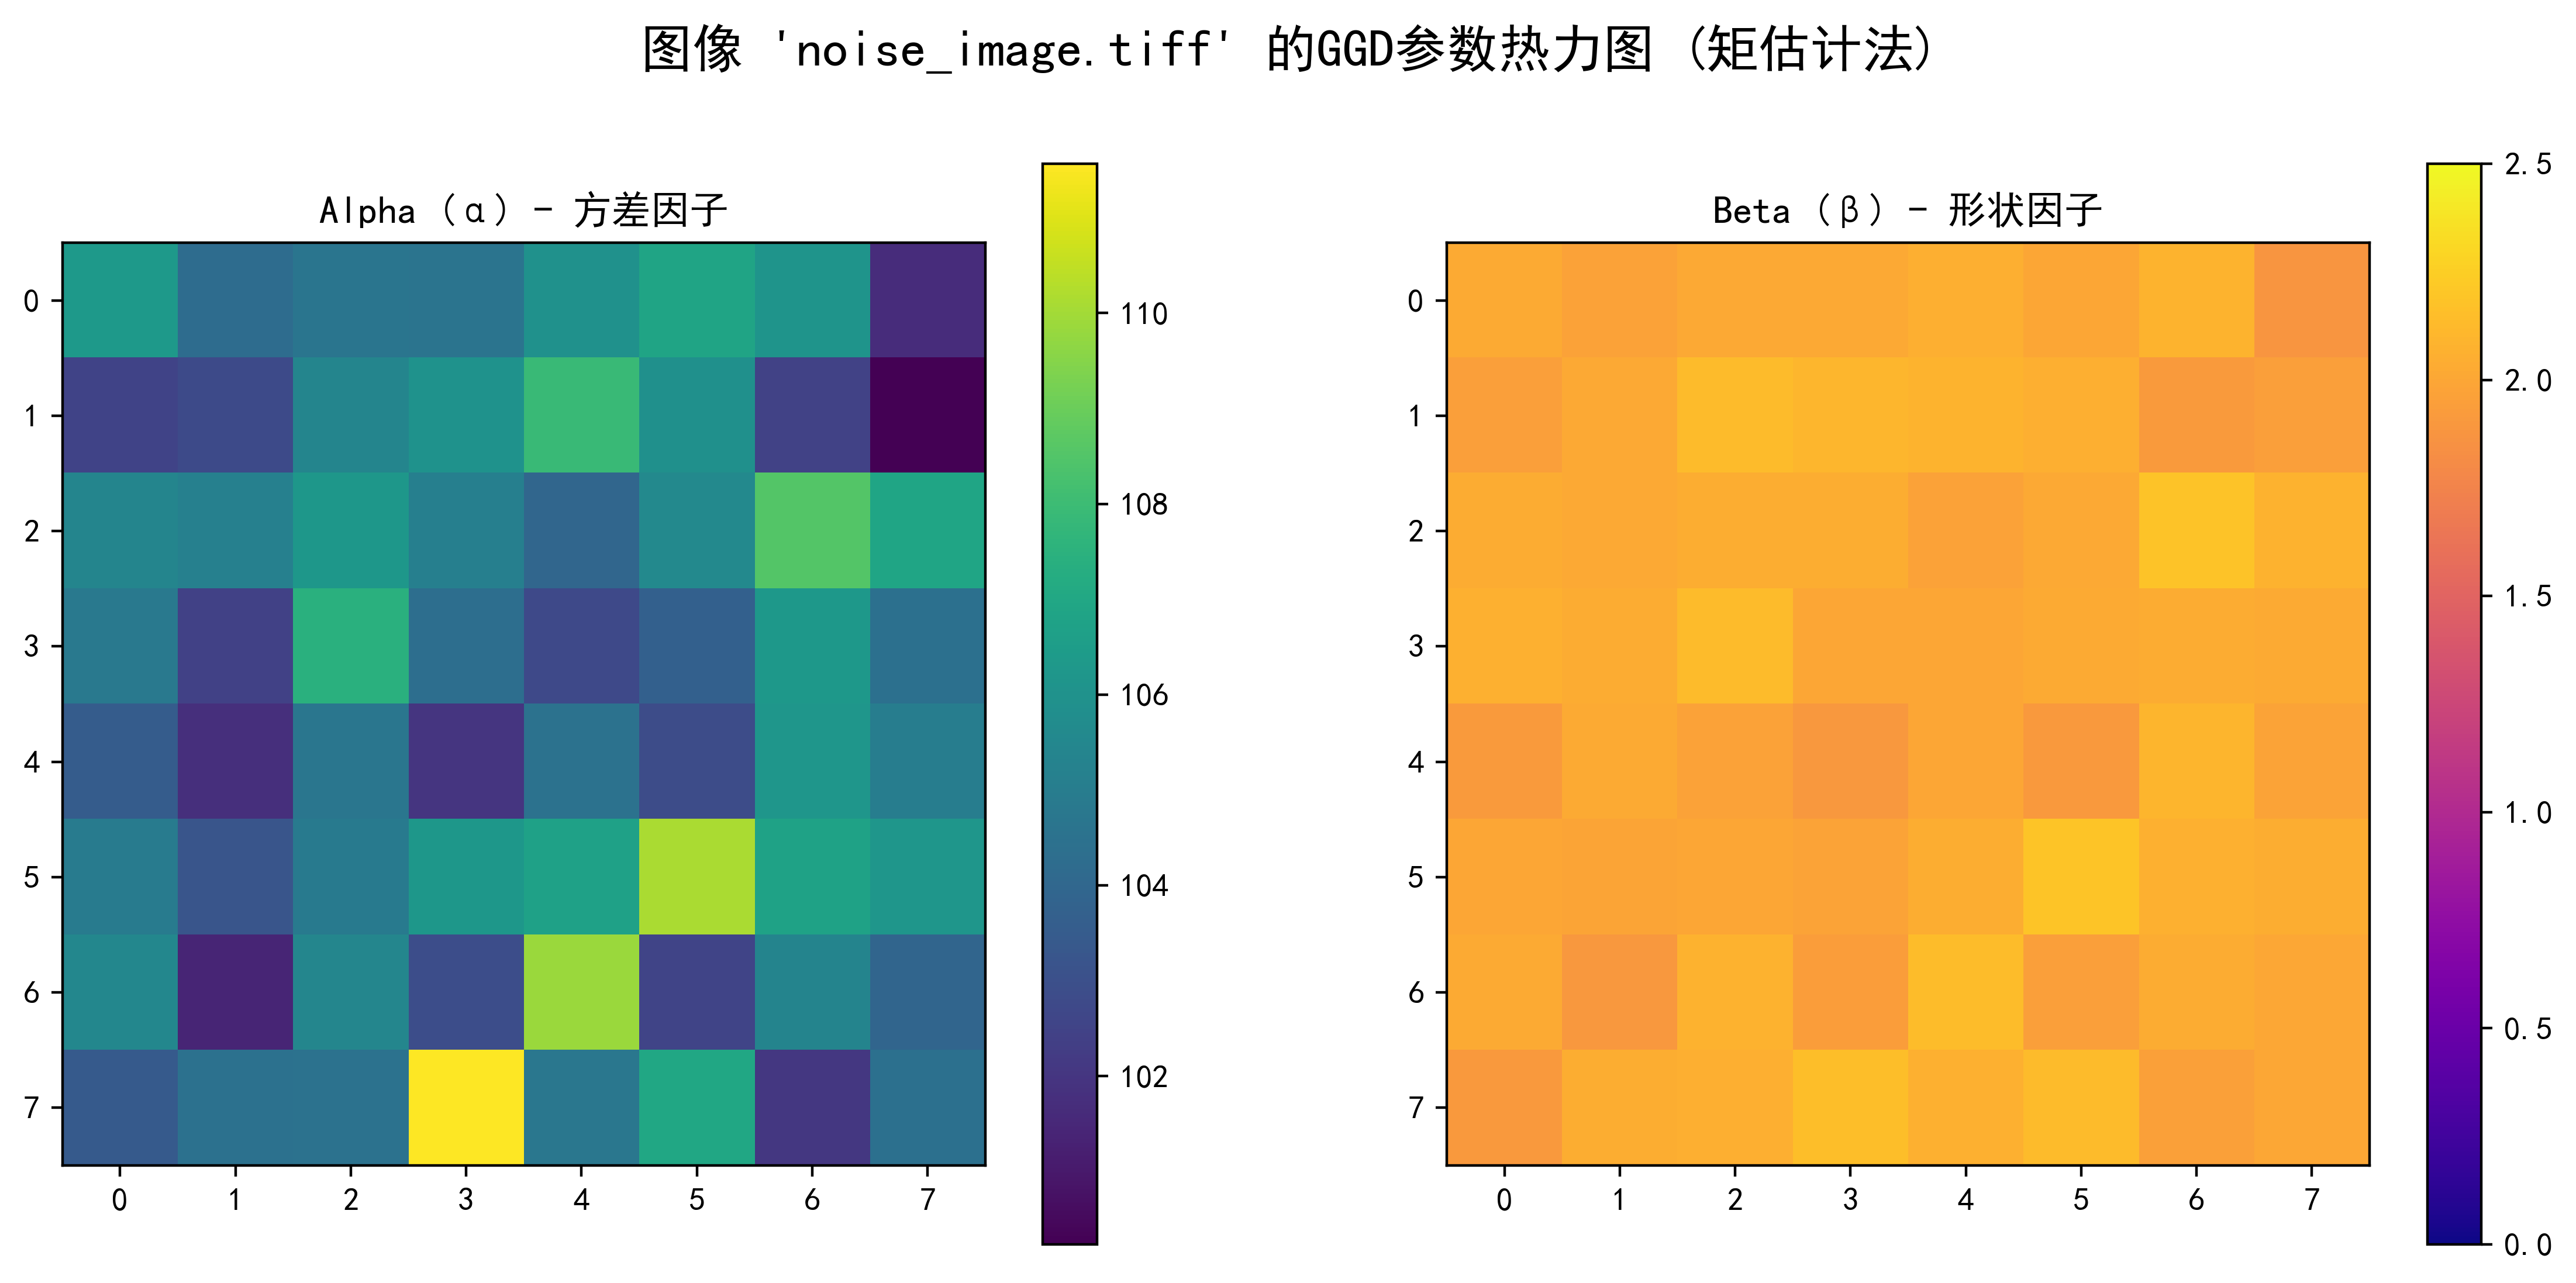

--- 方案二完成 ---

--- 正在执行方案三：绘制分布拟合图 ---
  选择的频率位置为: (0, 1)


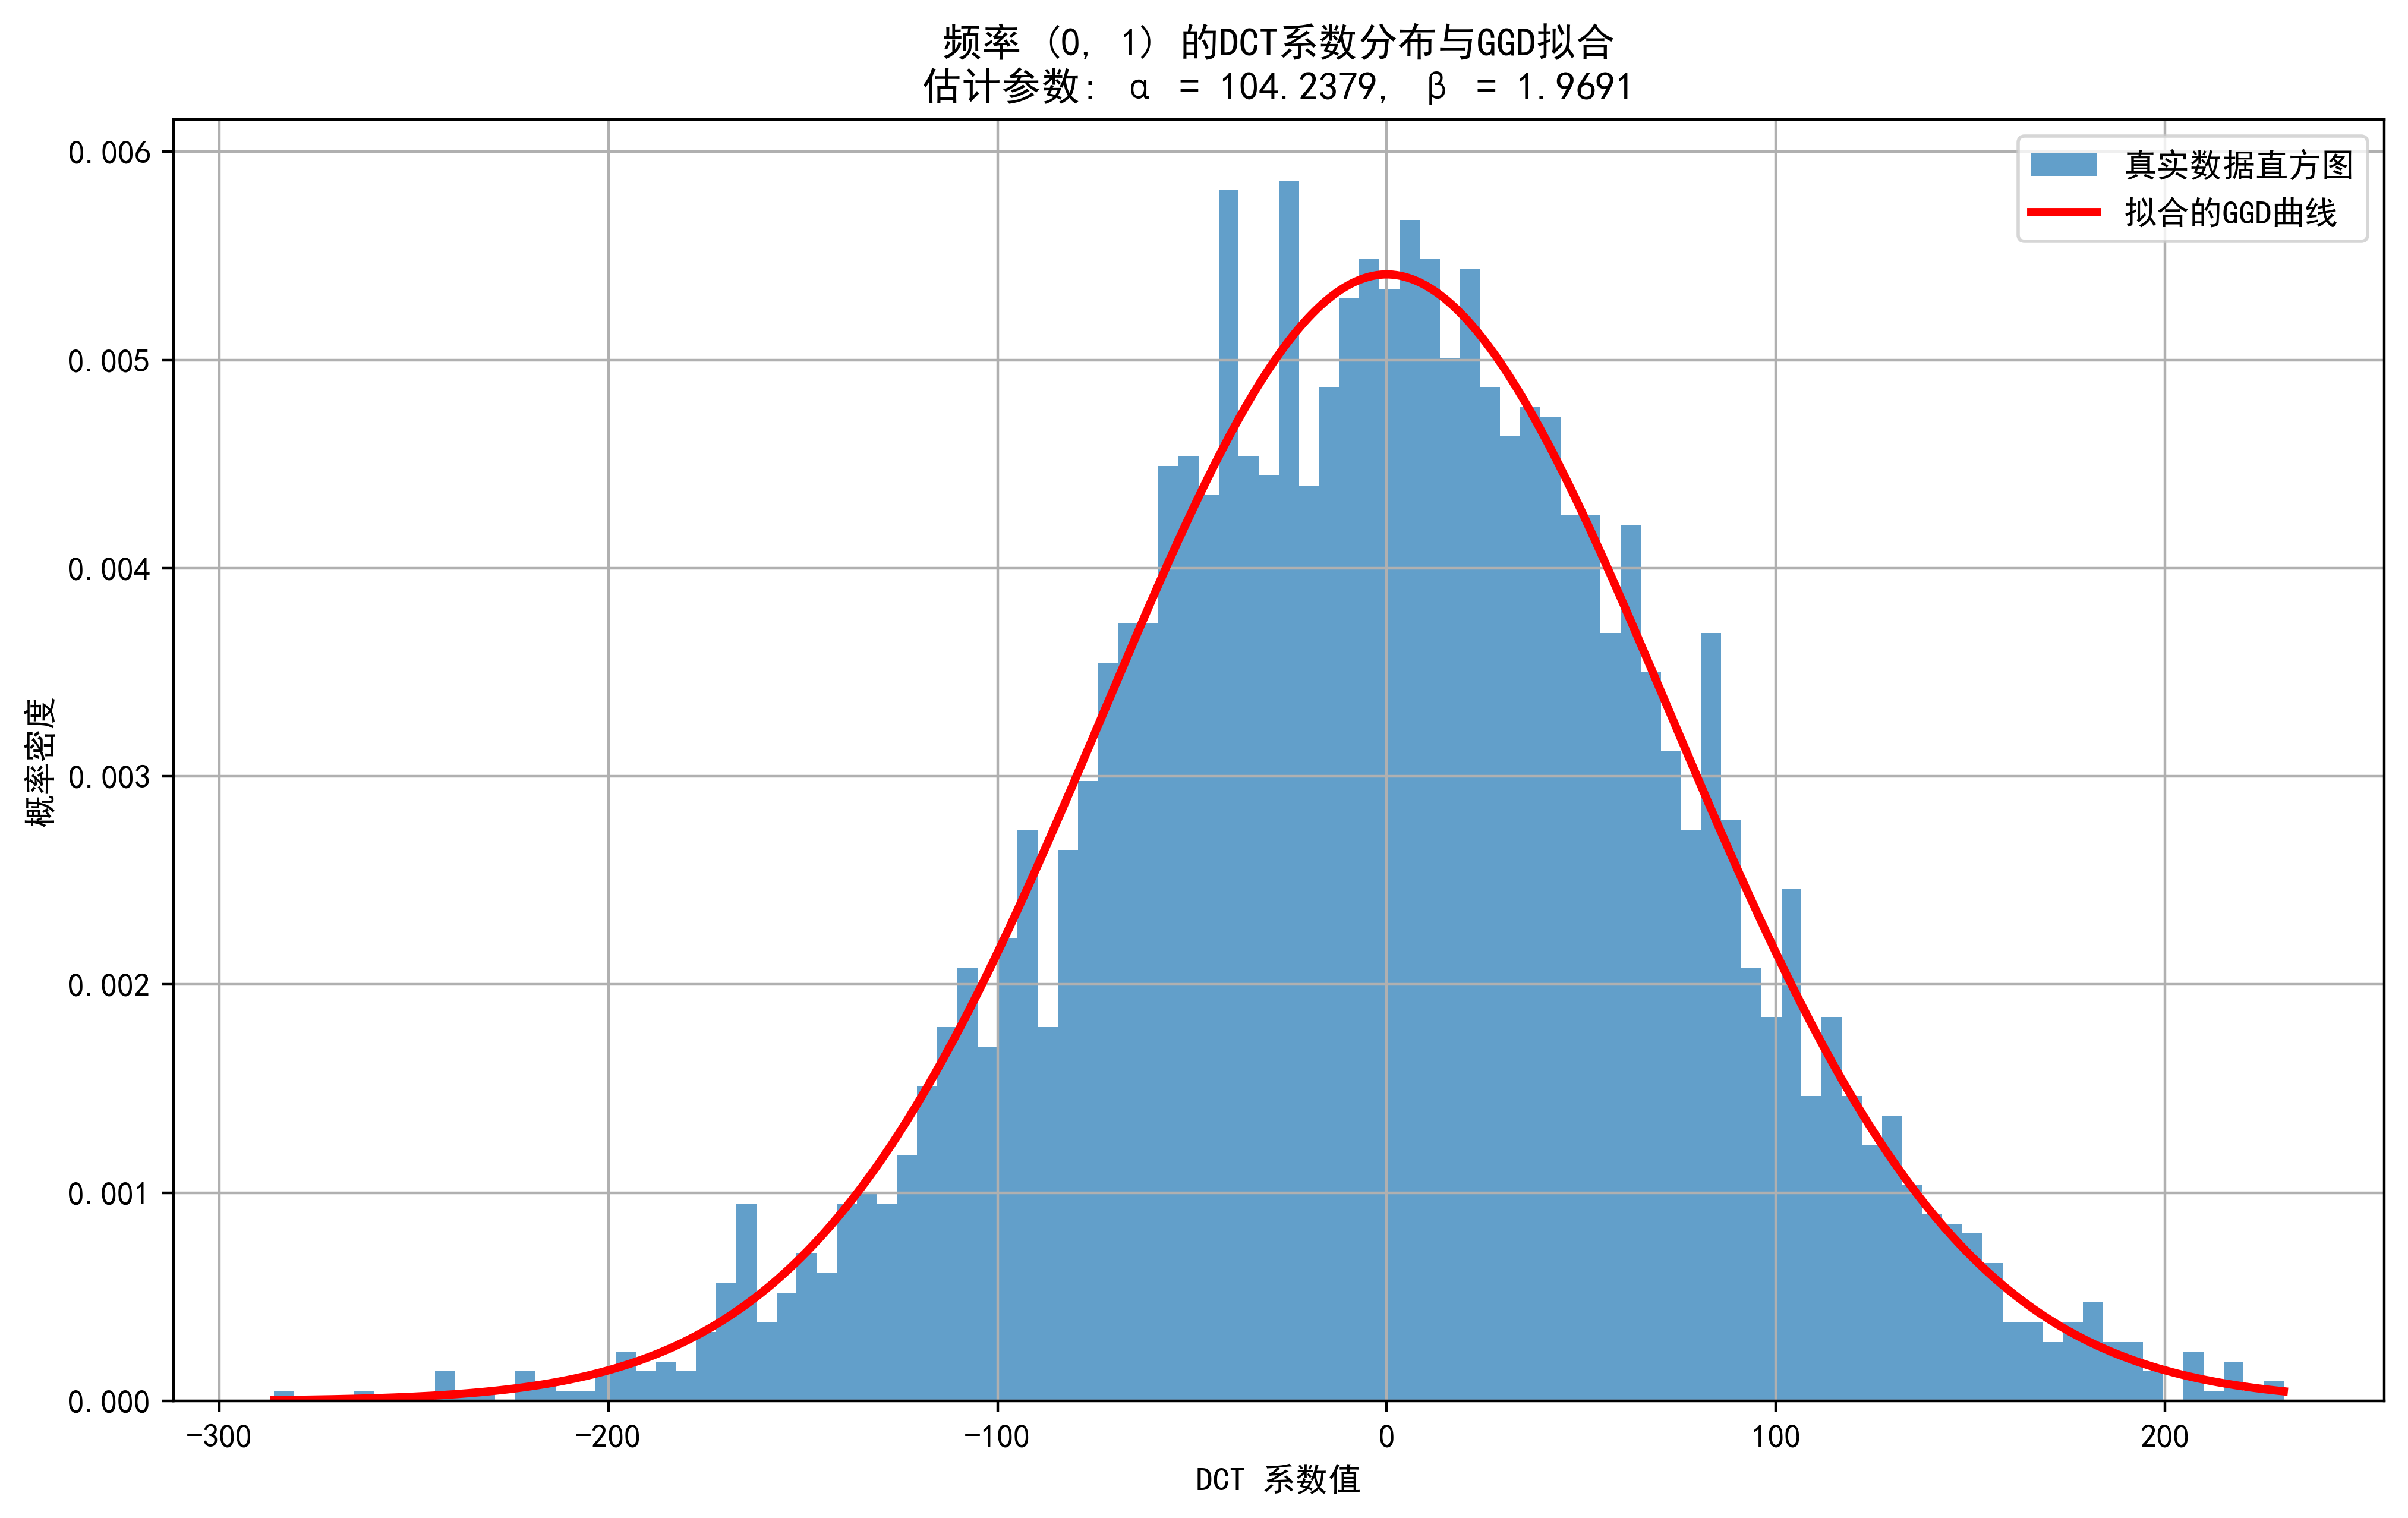

--- 方案三完成 ---


In [ ]:
import cv2
import numpy as np
from scipy.special import gamma
from scipy.optimize import bisect
import matplotlib.pyplot as plt
import warnings


plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  


warnings.filterwarnings('ignore', category=RuntimeWarning)

noise_image = np.random.randint(0, 256, (512, 512), dtype=np.uint8)

cv2.imwrite('noise_image.tiff', noise_image)

def get_dct_coefficients(image_path: str, u: int, v: int) -> np.ndarray:
    """加载图像，分块，并提取指定频率(u,v)的DCT系数。"""
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise FileNotFoundError(f"无法加载图像: {image_path}")
    except Exception as e:
        print(f"错误: {e}")
        return np.array([])

    img_float = img.astype(float) - 128.0
    height, width = img.shape
    coeffs = []

    for i in range(0, height, 8):
        for j in range(0, width, 8):
            block = img_float[i:i+8, j:j+8]
            if block.shape != (8, 8):
                continue
            dct_block = cv2.dct(block)
            coeffs.append(dct_block[u, v])
            
    return np.array(coeffs)

def estimate_ggd_moment(dct_coeffs: np.ndarray):
    """使用Mallat矩估计法估计GGD参数。"""
    if len(dct_coeffs) < 2: return None, None
    m1 = np.mean(np.abs(dct_coeffs))
    m2 = np.mean(dct_coeffs**2)
    if m1 < 1e-6 or m2 < 1e-6: return 0, float('inf')

    rho = m2 / (m1**2)
    def f(beta):
        try:
            return gamma(1/beta) * gamma(3/beta) / (gamma(2/beta)**2) - rho
        except ValueError:
            return float('inf')
            
    try:
        beta_hat = bisect(f, 0.1, 10.0, xtol=1e-6)
    except (ValueError, RuntimeError):
        return None, None
        
    alpha_hat = m1 * gamma(1/beta_hat) / gamma(2/beta_hat)
    return alpha_hat, beta_hat

def ggd_pdf(x, alpha, beta):
    """计算广义高斯分布(GGD)的概率密度函数值。"""
    if alpha is None or beta is None or alpha < 1e-6: return np.zeros_like(x)
    try:
        term1 = beta / (2 * alpha * gamma(1/beta))
        term2 = np.exp(-(np.abs(x) / alpha)**beta)
        return term1 * term2
    except (ValueError, ZeroDivisionError):
        return np.zeros_like(x)


if __name__ == '__main__':
    IMAGE_FILE = [
        'noise_image.tiff',
        'cat.tiff',
        'p2.jpg',
        'p3.jpg'
        ][0]

    
    
    print("--- 正在执行方案二：生成参数热力图 ---")
   

    alpha_matrix = np.zeros((8, 8))
    beta_matrix = np.zeros((8, 8))

    for u in range(8):
        for v in range(8):
            print(f"  正在处理频率 ({u},{v})...")
            coeffs = get_dct_coefficients(IMAGE_FILE, u, v)
            alpha, beta = estimate_ggd_moment(coeffs)
            if alpha is not None:
                alpha_matrix[u, v] = alpha
                beta_matrix[u, v] = beta
    
    # 绘制热力图
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=400)
    fig.suptitle(f"图像 '{IMAGE_FILE}' 的GGD参数热力图 (矩估计法)", fontsize=16)
    
    im_alpha = axes[0].imshow(alpha_matrix, cmap='viridis')
    axes[0].set_title('Alpha (α) - 方差因子')
    fig.colorbar(im_alpha, ax=axes[0])

    im_beta = axes[1].imshow(beta_matrix, cmap='plasma', vmin=0, vmax=2.5)
    axes[1].set_title('Beta (β) - 形状因子')
    fig.colorbar(im_beta, ax=axes[1])
    
    plt.show()
    print("--- 方案二完成 ---\n")

   
    print("--- 正在执行方案三：绘制分布拟合图 ---")
    freq_to_plot = (0, 1) # 选择一个典型的低频AC位置进行展示
    print(f"  选择的频率位置为: {freq_to_plot}")

    coeffs_single_freq = get_dct_coefficients(IMAGE_FILE, freq_to_plot[0], freq_to_plot[1])
    alpha_fit, beta_fit = estimate_ggd_moment(coeffs_single_freq)

    if alpha_fit is not None:
        plt.figure(figsize=(12, 7), dpi=400)
        # 绘制真实数据的直方图
        plt.hist(coeffs_single_freq, bins=100, density=True, label='真实数据直方图', alpha=0.7)
        
        # 绘制拟合的GGD PDF曲线
        x_range = np.linspace(min(coeffs_single_freq), max(coeffs_single_freq), 1000)
        pdf_values = ggd_pdf(x_range, alpha_fit, beta_fit)
        plt.plot(x_range, pdf_values, 'r-', lw=2.5, label='拟合的GGD曲线')
        
        title_text = (f"频率 {freq_to_plot} 的DCT系数分布与GGD拟合\n"
                      f"估计参数: α = {alpha_fit:.4f}, β = {beta_fit:.4f}")
        plt.title(title_text)
        plt.xlabel('DCT 系数值')
        plt.ylabel('概率密度')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"无法为频率 {freq_to_plot} 估计参数。")
        
    print("--- 方案三完成 ---")